# Good visualization
> Let's visualize some decision boundaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from geomstats.visualization import plot as gplot
from geomstats.geometry.hyperbolic import Hyperbolic

from sklearn.model_selection import train_test_split

# from src.hyperdt.toy_data import generate_gaussian_mixture_hyperboloid
from src.hyperdt.toy_data import wrapped_normal_mixture
from src.hyperdt.tree import HyperbolicDecisionTreeClassifier
from src.hyperdt.visualization import _get_geodesic, plot_tree, plot_boundary, plot_tree

INFO: Using numpy backend


In [3]:
# Some matplotlib settings

# Line width 4
plt.rc("lines", linewidth=4)

# Font size 20
plt.rc("font", size=20)

# Title font size 20
plt.rc("axes", titlesize=20)

# Subtitle font size 20
plt.rc("axes", labelsize=20)

# Tick font size 20
plt.rc("xtick", labelsize=20)

# Outlines for points
plt.rc("patch", force_edgecolor=True, edgecolor="black", linewidth=1)

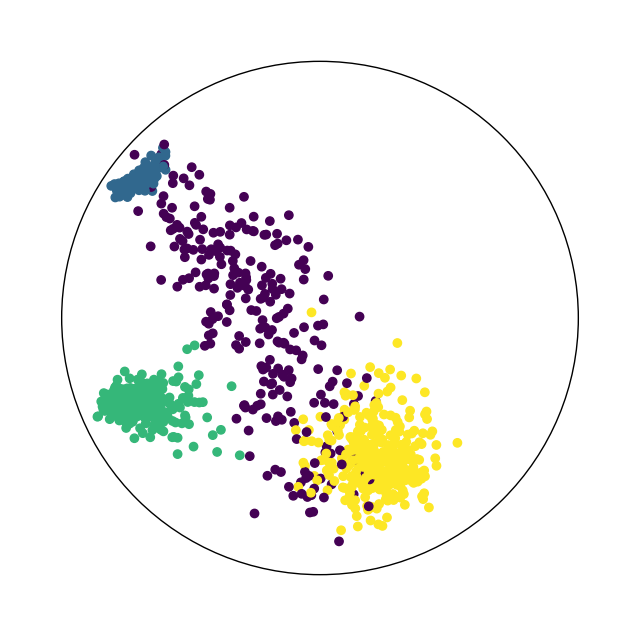

In [4]:
# Some data

X, y = wrapped_normal_mixture(num_points=1000, num_classes=4, noise_std=0.3, seed=2)

# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax = gplot(X, c=y, space="H2_poincare_disk")
plt.show()

In [5]:
# Split into train and test sets; train HDT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

hdt = HyperbolicDecisionTreeClassifier(timelike_dim=0, max_depth=3)
hdt.fit(X_train, y_train)

hdt_score = hdt.score(X_test, y_test)
print(hdt_score)

0.92


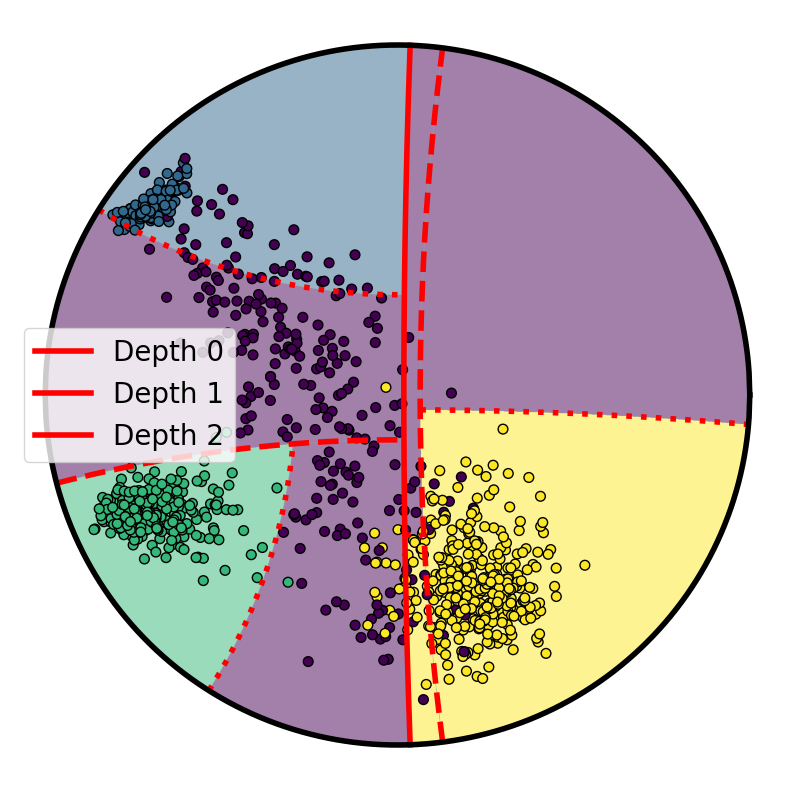

In [6]:
# Use the default axes to make something prettier for the paper

ax = plot_tree(hdt, X=X, y=y)

# Fatten up lines
for line in ax.lines:
    line.set_linewidth(4)

# Turn off axes
ax.set_axis_off()

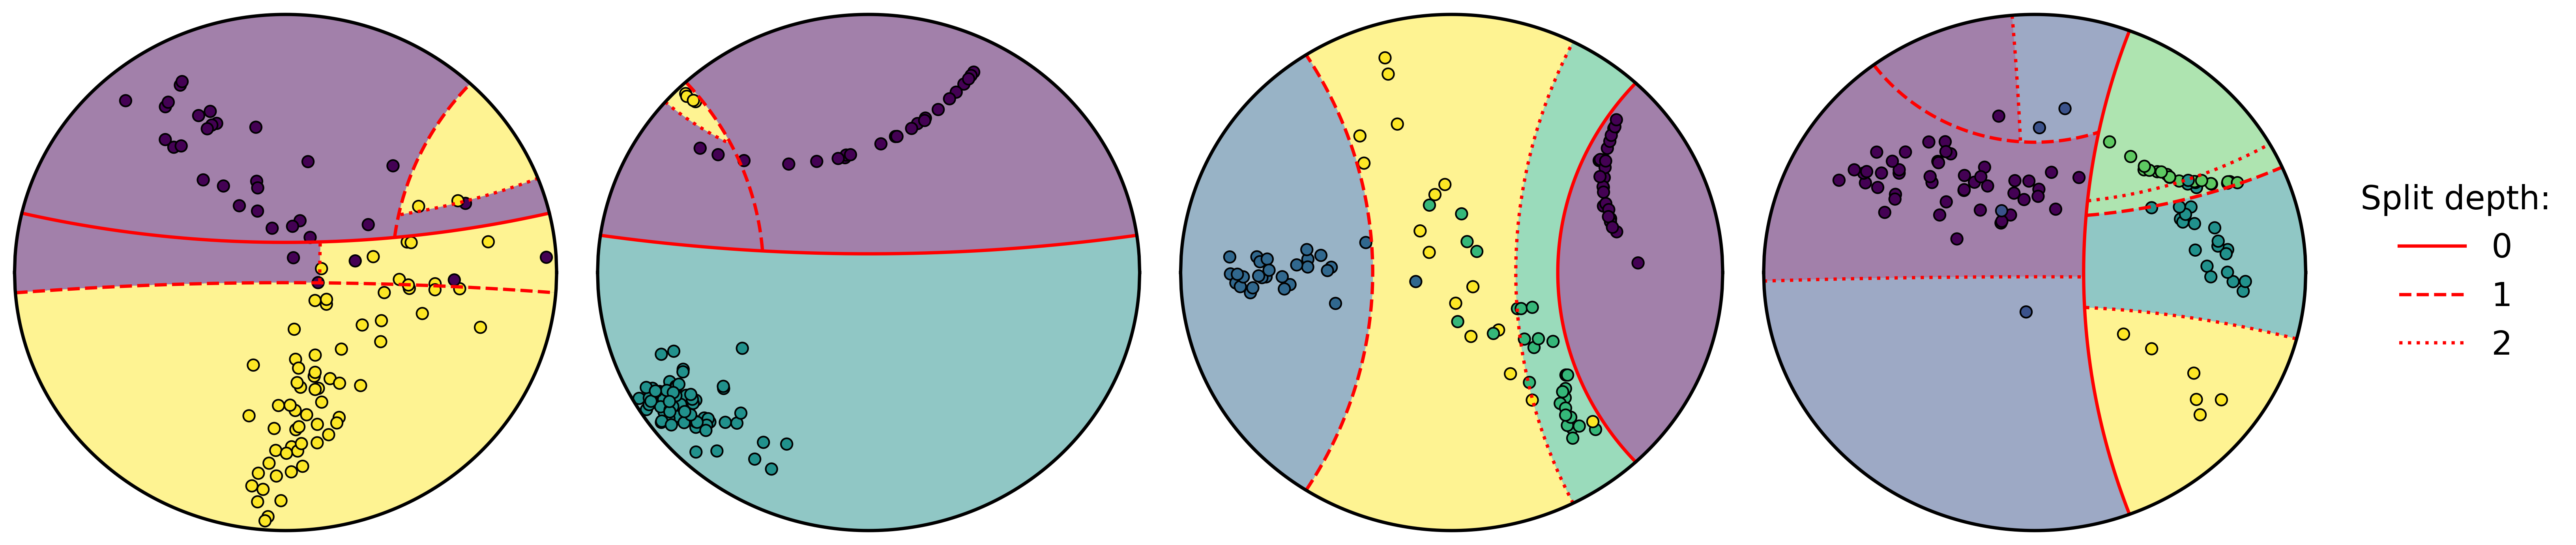

In [7]:
# Try this for 3 different seeds - this takes about a minute

fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi=300)

for i, (ax, seed, n_classes) in enumerate(zip(axs, [6, 8, 10, 13], [2, 3, 4, 5])):
    X, y = wrapped_normal_mixture(num_points=100, num_classes=n_classes, noise_std=0.3, seed=seed)
    hdt = HyperbolicDecisionTreeClassifier(timelike_dim=0, max_depth=3)
    hdt.fit(X, y)
    ax = plot_tree(hdt, X=X, y=y, ax=ax)
    ax.set_axis_off()
    ax.legend_ = None
    ax.set_xlim([-1.01, 1.01])
    ax.set_ylim([-1.01, 1.01])

    # Change line width
    for line in ax.lines:
        line.set_linewidth(2)

fig.tight_layout()

# Set fake legend
# cmap = plt.cm.get_cmap("gist_heat", hdt.max_depth * 2)  # 2x keeps colors from being too light
# colors = [cmap(i) for i in range(hdt.max_depth)]
# colors = ["k"] * hdt.max_depth
styles = ["solid", "dashed", "dotted"]
fig.legend(
    title = "Split depth:",
    handles=[plt.Line2D([0], [0], color="red", linestyle=s, label=i, lw=2) for i, s in enumerate(styles)],
    # ncol=3,
    ncol=1,
    # loc="lower center",
    loc="center right",
    fontsize=20,
    # bbox_to_anchor=(0.5, -0.05),
    bbox_to_anchor=(1.1, 0.5),
    frameon=False,
)

In [8]:
# Let's draw the hyperboloid decision boundary

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Params
MAX_RADIUS = 10
THETA = np.pi / 4
LW = 2

# Hyperboloid
_x = np.linspace(-MAX_RADIUS, MAX_RADIUS, 100)
_y = np.linspace(-MAX_RADIUS, MAX_RADIUS, 100)
xx, yy = np.meshgrid(_x, _y)
zz = np.sqrt(xx2**2 + yy2**2 + 1)

# Plane angled at pi/4 + 0.1
_x2 = np.linspace(-MAX_RADIUS * 10, MAX_RADIUS * 10, 100)
_y2 = np.linspace(-MAX_RADIUS * 10, MAX_RADIUS * 10, 100)
xx2, yy2 = np.meshgrid(_x2, _y2)
zz2 = np.tan(THETA) * yy2

# Plot surfaces
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xx, yy, zz, alpha=1, cmap="viridis", linewidth=0.1, edgecolor="black")
ax.plot_surface(xx2, yy2, zz2, alpha=1, cmap="viridis")

# Remove all grids, spines, etc
ax.grid(False)
ax.set_zlim(0, MAX_RADIUS * 1.1)
ax.set_xlim(-MAX_RADIUS * 1.1, MAX_RADIUS * 1.1)
ax.set_ylim(-MAX_RADIUS * 1.1, MAX_RADIUS * 1.1)
ax.set_axis_off()

NameError: name 'xx2' is not defined

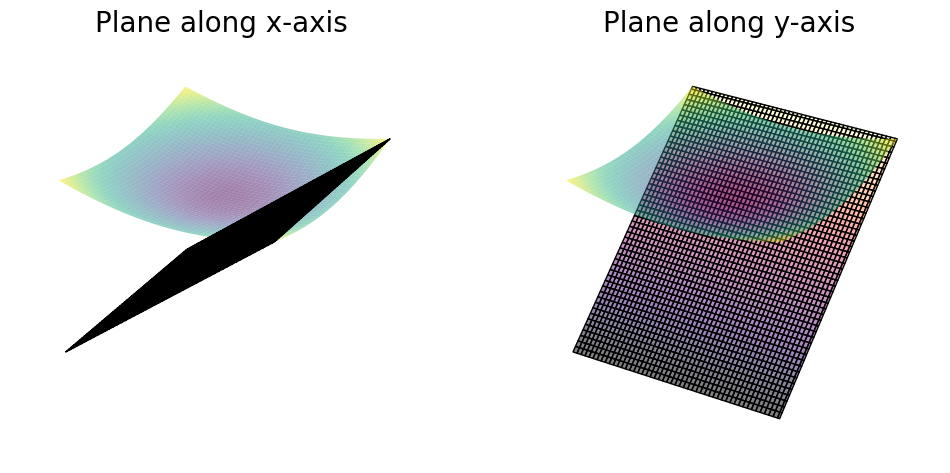

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Basic grid setup
_x = np.linspace(-1, 1, 100)
_y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(_x, _y)

# Hyperboloid equation (upper sheet, curvature = 1)
zz_hyperboloid = np.sqrt(xx**2 + yy**2 + 1)

# Plane equations
theta = np.pi / 3  # Set the angle here, 45 degrees as an example

# Plane along x-axis
zz_plane_x = np.tan(theta) * xx

# Plane along y-axis
zz_plane_y = np.tan(theta) * yy

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot with plane along x-axis
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(xx, yy, zz_hyperboloid, alpha=0.5, cmap="viridis", linewidth=0)
ax1.plot_surface(xx, yy, zz_plane_x, alpha=0.5, cmap="magma")
ax1.set_title("Plane along x-axis")

# Plot with plane along y-axis
ax2 = fig.add_subplot(122, projection="3d")
ax2.plot_surface(xx, yy, zz_hyperboloid, alpha=0.5, cmap="viridis", linewidth=0)
ax2.plot_surface(xx, yy, zz_plane_y, alpha=0.5, cmap="magma")
ax2.set_title("Plane along y-axis")

# Remove grids and spines
for ax in [ax1, ax2]:
    ax.grid(False)
    ax.set_axis_off()

plt.show()

In [ ]:
from matplotlib import cm
import numpy as np

# Initialize the viridis colormap
viridis = cm.get_cmap("viridis", 12)

# Get the RGB values for purple, green, and yellow from the viridis colormap
# We pick values from the lower, middle, and upper parts of the colormap to get typical colors for 3-value plotting.
purple_rgb = viridis(0.0)[:3]
green_rgb = viridis(0.5)[:3]
yellow_rgb = viridis(0.9)[:3]


# Convert RGB to HEX
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))


# Get HEX values
purple_hex = rgb_to_hex(purple_rgb)
green_hex = rgb_to_hex(green_rgb)
yellow_hex = rgb_to_hex(yellow_rgb)

purple_hex, green_hex, yellow_hex

/tmp/ipykernel_2182830/30985830.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 12)


('#440154', '#1e9a89', '#c2df22')

In [ ]:
from matplotlib.colors import to_hex


# Function to interpolate between two RGB colors
def interpolate_rgb(color1, color2, alpha):
    return [c1 * (1 - alpha) + c2 * alpha for c1, c2 in zip(color1, color2)]


# Convert HEX to RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip("#")
    return tuple(int(hex_code[i : i + 2], 16) / 255 for i in (0, 2, 4))


# Convert the HEX codes to RGB
purple_rgb = hex_to_rgb("#440154")
green_rgb = hex_to_rgb("#1e9a89")
white_rgb = hex_to_rgb("#ffffff")

# Interpolate between purple and green
# interpolated_rgb = interpolate_rgb(purple_rgb, green_rgb, 0.5)
interpolated_rgb = interpolate_rgb(white_rgb, purple_rgb, 0.5)

# Convert the interpolated RGB to HEX
interpolated_hex = to_hex(interpolated_rgb)

interpolated_hex

'#a280aa'

In [ ]:
from matplotlib.colors import to_hex


# Function to interpolate between two RGB colors
def interpolate_rgb(color1, color2, alpha):
    return [c1 * (1 - alpha) + c2 * alpha for c1, c2 in zip(color1, color2)]


# Function to darken a color by a given factor
def darken_rgb(color, factor=0.5):
    return [c * factor for c in color]


# Convert HEX to RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip("#")
    return tuple(int(hex_code[i : i + 2], 16) / 255 for i in (0, 2, 4))


# Convert the HEX codes to RGB
purple_rgb = hex_to_rgb("#440154")
green_rgb = hex_to_rgb("#1e9a89")
yellow_rgb = hex_to_rgb("#c2df22")

# Darken the purple color
dark_purple_rgb = darken_rgb(purple_rgb, 0.6)
dark_yellow_rgb = darken_rgb(yellow_rgb, 0.6)

# Interpolate between dark purple and green
# interpolated_rgb_dark_purple_green = interpolate_rgb(dark_purple_rgb, green_rgb, 0.5)
interpolated_rgb_dark_purple_green = darken_rgb(interpolate_rgb(dark_purple_rgb, green_rgb, 0.5), 0.4)
interpolated_rgb_dark_purple_white = darken_rgb(interpolate_rgb(dark_purple_rgb, white_rgb, 0.5), 0.4)

# Convert these RGB values to HEX
dark_purple_hex = to_hex(dark_purple_rgb)
interpolated_hex_dark_purple_green = to_hex(interpolated_rgb_dark_purple_green)

print("Dark Purple:", dark_purple_hex)
print("Dark Yellow:", to_hex(dark_yellow_rgb))
print("Halfway between Green and Dark Purple:", interpolated_hex_dark_purple_green)
print("Halway between White and Dark Purple:", to_hex(interpolated_rgb_dark_purple_white))

Dark Purple: #290132
Dark Yellow: #748614
Halfway between Green and Dark Purple: #0e1f25
Halway between White and Dark Purple: #3b333d


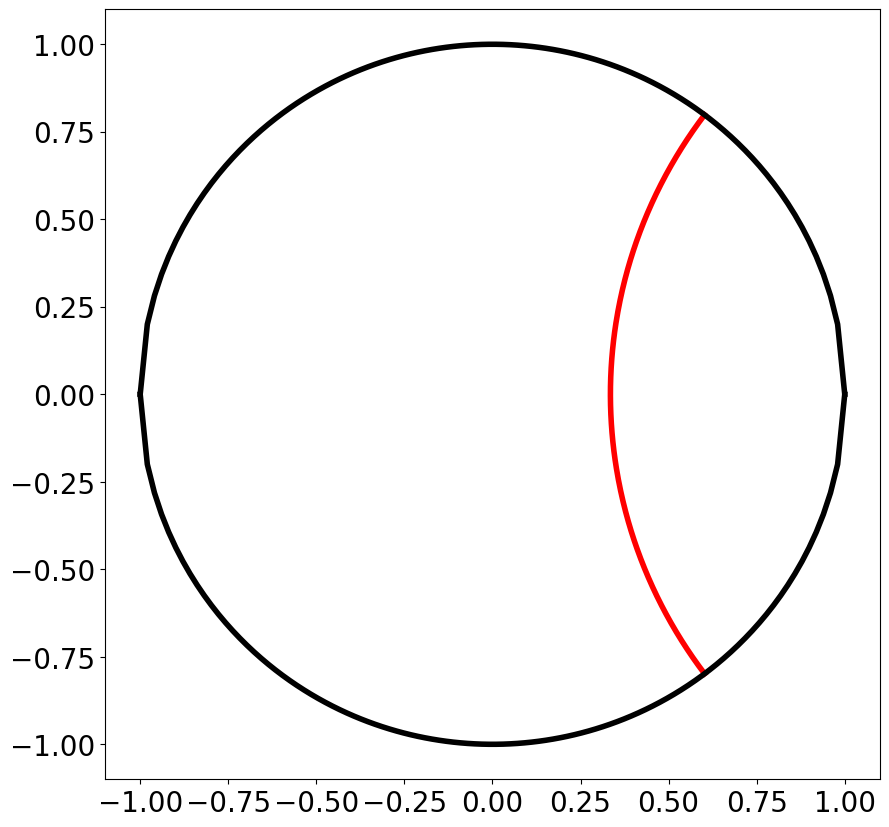

In [ ]:
from src.hyperdt.visualization import plot_boundary

# Convert to radians
theta_deg = 58.947  # Extracted from Blender
theta = theta_deg * np.pi / 180

plot_boundary(1, theta)

_x = np.linspace(-1, 1, 100)
_y = np.sqrt(1 - _x**2)
plt.plot(_x, _y, color="black")
plt.plot(_x, -_y, color="black")